# Pothole Detection using Tensorflow Object Detection (TFOD)
by Divit Saini

### Background

Potholes arise as a result of road wear and tear and weathering. They not only create inconvenience to individuals, but they also result in deaths as a result of car accidents. Potholes and poor road conditions cause around 2000 fatal accidents in the United States each year.
Vision-based pothole detection can be classified into two different categories:
1. 2D Image-based approaches: 
    
    The image is divided into defect and non-defect regions in the 2D Image-based method. The geometry of a pothole can be approximated using graphic properties of a faulted zone. The composition of a region is determined and compared to the defective region's composition. If the identified composition is coarser and grainier than the area of interest, it is assumed to be a pothole.


2. Video-based approaches:

    To overthrow this disadvantage of a 2D image-based method, video-based methods were introduced. These methods were used to find a pothole and count the total number of potholes in the sequence of frames.
    

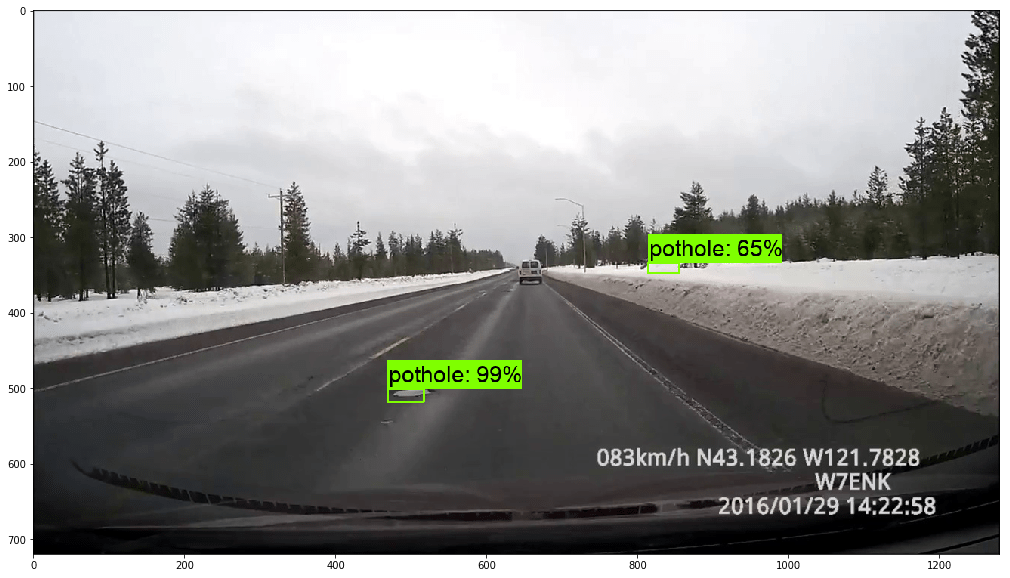

### Objective

In this notebook, we will cover a step-bystep approach on how to perform Custom Object Detection using TFOD. It was performed on annotated pothole dataset on Kaggle. The pretrained model used was The pre-requisites to this notebook includes the installation of Tensorflow Object Detection API.

1. The link to the dataset: https://www.kaggle.com/chitholian/annotated-potholes-dataset
2. The link to the installation of TFOD guide: https://tensorflow-object-detection-api tutorial.readthedocs.io/en/latest/install.html

### Dataset Description:

It is a labeled image dataset of the potholes with the labels mentioned in a .xml files just affter each image file.

Total number of .jpg files = 665
Total number of .xml files = 665

### Methodology
The implementation methodology is as follows:

1. Creating a traning-demo folder architecture


2. Importing the DATASET using kaggle API into images subfolder
    1. Downloading and unzipping folder to access images



3. Data Preprocessing:
    1. train-test split
    2. Changing the label_map file
    3. Creating TensorFlow Records using the .py module in Object Detection
  
  

4. Download pre-trained model


5. Traning a custom model using the dataset:
    1. Changing the pipeline.congif file
    2. Training the model
  
  
   
6. Testing using a test image


        
7. Conclusion



8. References


Note: This was initially implemented on jupyter notebook on windows

## 1. Creating a training-demo folder

training_demo/

├─ annotations/

├─ exported-models/

├─ images/

│  ├─ test/

│  └─ train/

├─ models/

├─ pre-trained-models/

├─ preprocessing/

└─ README.md

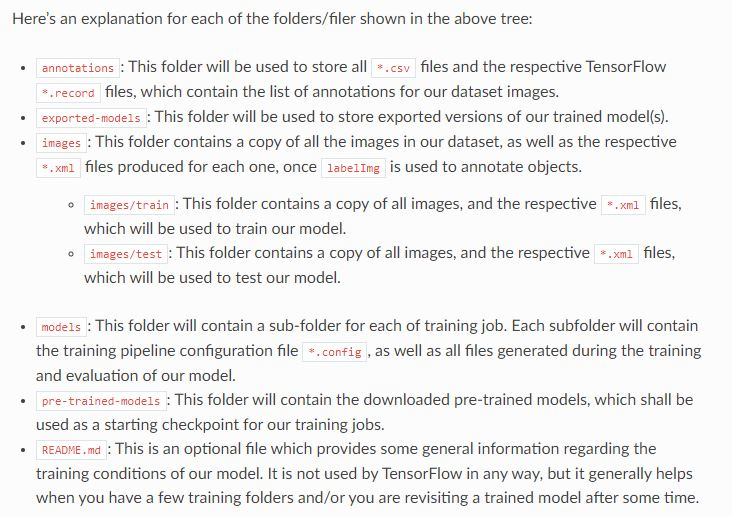

## 2. Importing DATASET using Kaggle API

In [1]:
!pip install kaggle

In [2]:
# changing the directory to Mini-project-3 folder
cd C:\Users\Divit\Deep learning\Tensorflow\Mini-project-3

C:\Users\Divit\Deep learning\Tensorflow\Mini-project-3


In [5]:
import os

#downloading the dataset
os.environ['KAGGLE_USERNAME'] = "divitsaini" # username from the json file
os.environ['KAGGLE_KEY'] = "a6f797604b7cac5129cdada9513ca135" # key from the json file
!kaggle datasets download -d chitholian/annotated-potholes-dataset


  0%|          | 0.00/45.9M [00:00<?, ?B/s]
  2%|2         | 1.00M/45.9M [00:00<00:17, 2.64MB/s]
  4%|4         | 2.00M/45.9M [00:00<00:15, 3.07MB/s]
  7%|6         | 3.00M/45.9M [00:01<00:14, 3.19MB/s]
  9%|8         | 4.00M/45.9M [00:01<00:17, 2.53MB/s]
 11%|#         | 5.00M/45.9M [00:01<00:15, 2.78MB/s]
 13%|#3        | 6.00M/45.9M [00:02<00:14, 2.95MB/s]
 15%|#5        | 7.00M/45.9M [00:02<00:13, 2.99MB/s]
 17%|#7        | 8.00M/45.9M [00:02<00:12, 3.09MB/s]
 20%|#9        | 9.00M/45.9M [00:03<00:12, 3.17MB/s]
 22%|##1       | 10.0M/45.9M [00:03<00:11, 3.17MB/s]
 24%|##3       | 11.0M/45.9M [00:03<00:11, 3.19MB/s]
 26%|##6       | 12.0M/45.9M [00:04<00:10, 3.27MB/s]
 28%|##8       | 13.0M/45.9M [00:04<00:10, 3.29MB/s]
 30%|###       | 14.0M/45.9M [00:04<00:10, 3.27MB/s]
 33%|###2      | 15.0M/45.9M [00:05<00:10, 3.09MB/s]
 35%|###4      | 16.0M/45.9M [00:05<00:10, 3.01MB/s]
 37%|###7      | 17.0M/45.9M [00:05<00:09, 3.12MB/s]
 39%|###9      | 18.0M/45.9M [00:06<00:09, 3.13MB/s]
 

In [10]:
# unzipping the folder
import zipfile

local_zip = "C:/Users/Divit/Deep learning/Tensorflow/Mini-project-3/annotated-potholes-dataset.zip"
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('C:/Users\Divit/Deep learning/Tensorflow/Mini-project-3')
zip_ref.close()

After unzipping, move the images in the Images sub-folder in training_demo main folder.

## 3. Data Preprocessing

Copy and paste the "partition_dataset.py" and "generate_tfrecord.py" module files from object detection folder (downloaded after installing the TFOD API) to the preprocessing subfolder of tranining_demo.

In [14]:
#changing the directory
cd C:/Users/Divit/Deep learning/Tensorflow/Mini-project-3/training_demo/preprocessing

C:\Users\Divit\Deep learning\Tensorflow\Mini-project-3\training_demo\preprocessing


### 3.1 Train-Test Split

Syntax used:

!python partition_dataset.py -x -i [PATH_TO_IMAGES_FOLDER] -r 0.1

In [18]:
# using "partition_dataset.py" to carry out train test split in the ratio of 0.8:0.2
!python partition_dataset.py -x -i "C:\Users\Divit\Deep learning\Tensorflow\Mini-project-3\training_demo\images" -r 0.2

C:\Users\Divit\Deep learning\Tensorflow\Mini-project-3\training_demo\preprocessing\partition_dataset.py:35: DeprecationWarning: Flags not at the start of the expression '([a-zA-Z0-9\\s_\\\\.\\-\\' (truncated)
  if re.search(r'([a-zA-Z0-9\s_\\.\-\(\):])+(?i)(.jpg|.jpeg|.png)$', f)]


### 3.2 Creating tensorflow records

In [19]:
cd C:/Users/Divit/Deep learning/Tensorflow/Mini-project-3/training_demo/preprocessing

C:\Users\Divit\Deep learning\Tensorflow\Mini-project-3\training_demo\preprocessing


A Label Map is a simple .txt file (.pbtxt to be exact). It links labels to some integer values. The TensorFlow Object Detection API needs this file for training and detection purposes.

Before we carry out the preprocessing, we edit the label_map.pptxt to the image described below

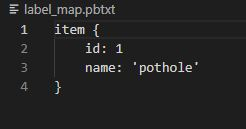

Syntax used to create the tfrecord from generate_tfrecord.py:

!python generate_tfrecord.py 
-x [PATH_TO_IMAGES_FOLDER]/train 
-l [PATH_TO_ANNOTATIONS_FOLDER]/label_map.pbtxt 
-o [PATH_TO_ANNOTATIONS_FOLDER]/train.record

In [20]:
# using "generate_tfrecord.py" to create the train data used by the tfod api
!python generate_tfrecord.py -x "C:\Users\Divit\Deep learning\Tensorflow\Mini-project-3\training_demo\images\train" -l "C:\Users\Divit\Deep learning\Tensorflow\Mini-project-3\training_demo\annotations\label_map.pbtxt" -o "C:\Users\Divit\Deep learning\Tensorflow\Mini-project-3\training_demo\annotations\train.record"

# using "generate_tfrecord.py" to create the test data used by the tfod api
!python generate_tfrecord.py -x "C:\Users\Divit\Deep learning\Tensorflow\Mini-project-3\training_demo\images\test" -l "C:\Users\Divit\Deep learning\Tensorflow\Mini-project-3\training_demo\annotations\label_map.pbtxt" -o "C:\Users\Divit\Deep learning\Tensorflow\Mini-project-3\training_demo\annotations\test.record"

Successfully created the TFRecord file: C:\Users\Divit\Deep learning\Tensorflow\Mini-project-3\training_demo\annotations\train.record
Successfully created the TFRecord file: C:\Users\Divit\Deep learning\Tensorflow\Mini-project-3\training_demo\annotations\test.record


## 4. Download Pre-Trained Model

We have used SSD ResNet50 V1 FPN 640x640 model, since it provides a relatively good trade-off between performance and speed. However, there exist a number of other models you can use, all of which are listed in TensorFlow 2 Detection Model Zoo.

The link from where we can download the model is https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf2_detection_zoo.md

In [22]:
cd C:\Users\Divit\Deep learning\Tensorflow\Mini-project-3\training_demo\pre-trained-models

C:\Users\Divit\Deep learning\Tensorflow\Mini-project-3\training_demo\pre-trained-models


After downloading the model, use tar coomand to extract the model in the pre-trained subfolder

In [23]:
!tar -xvf ssd_resnet101_v1_fpn_640x640_coco17_tpu-8.tar.gz

x ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/
x ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/checkpoint/
x ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
x ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/checkpoint/checkpoint
x ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/checkpoint/ckpt-0.index
x ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/pipeline.config
x ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/saved_model/
x ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/saved_model/saved_model.pb
x ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/saved_model/assets/
x ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/saved_model/variables/
x ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
x ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/saved_model/variables/variables.index


training_demo/

├─ ...

├─ pre-trained-models/

│  └─ ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/

│     ├─ checkpoint/

│     ├─ saved_model/

│     └─ pipeline.config

└─ ...

## 5. Training the model

### 5.1. Editing the pipeline.config file

Now that we have downloaded and extracted our pre-trained model, let’s create a directory for our training job.

training_demo/

├─ ...

├─ models/

│  └─ my_ssd_resnet50_v1_fpn/

│     └─ pipeline.config

└─ ..

In this case, the pipepline.congif file is the same as file downloaded in the pre-tranined-models directory.

This file needs to be editing in the following ways:

1. line 3    num_classes: 1 (# Set this to the number of different label classes)


2. line 131  batch_size: 2 (# Increase/Decrease this value depending on the available memory (Higher values require more memory and vice-versa))


3. line 161  fine_tune_checkpoint: "pre-trained-models/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/checkpoint/ckpt-0" (# Path to checkpoint of pre-trained model)


4. line 162  num_steps: 1500



5. line 167  fine_tune_checkpoint_type: "detection" (# Set this to "detection" since we want to be training the full detection model)


6. line 172 label_map_path: "annotations/label_map.pbtxt" (# Path to label map file)


7. line 174    input_path: "annotations/train.record" (# Path to training TFRecord file)


8. line 178 metrics_set: "coco_detection_metrics" 


9. line 186    input_path: "annotations/test.record" (# Path to testing TFRecord)


In [10]:
cd C:\Users\Divit\Deep learning\Tensorflow\Mini-project-3\training_demo

C:\Users\Divit\Deep learning\Tensorflow\Mini-project-3\training_demo


In [1]:
pwd

'C:\\Users\\Divit\\Deep learning\\Tensorflow\\Mini-project-3\\training_demo'

After Installing the NVIDIA CUDA toolkit and cDNN library, the below code helps to check whether the GPU is being used or no

In [2]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [3]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Nov_30_19:15:10_Pacific_Standard_Time_2020
Cuda compilation tools, release 11.2, V11.2.67
Build cuda_11.2.r11.2/compiler.29373293_0


### 5.2. Training the model

Before we begin training our model, let’s go and copy the /models/research/object_detection/model_main_tf2.py script downloaded during the installation of TFOD API. Paste it straight into our training_demo folder. We will need this script in order to train our model.

In [4]:
!python model_main_tf2.py --model_dir="C:\Users\Divit\Deep learning\Tensorflow\Mini-project-3\training_demo\models\my_ssd_resnet101_v1_fpn" --pipeline_config_path="C:\Users\Divit\Deep learning\Tensorflow\Mini-project-3\training_demo\models\my_ssd_resnet101_v1_fpn\pipeline.config" --checkpoint_every_n=100 --alsologtostderr

2021-08-27 21:13:54.143794: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library cudart64_110.dll
2021-08-27 21:13:57.187984: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library nvcuda.dll
2021-08-27 21:13:57.213878: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: GeForce GTX 1650 Ti computeCapability: 7.5
coreClock: 1.485GHz coreCount: 16 deviceMemorySize: 4.00GiB deviceMemoryBandwidth: 178.84GiB/s
2021-08-27 21:13:57.213901: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library cudart64_110.dll
2021-08-27 21:13:57.219257: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library cublas64_11.dll
2021-08-27 21:13:57.219275: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library cublasLt64_11.

### 5.3. Exporting the model in the valid format

Once your training job is complete, you need to extract the newly trained inference graph, which will be later used to perform the object detection. This can be done as follows:

1. Copy the TensorFlow/models/research/object_detection/exporter_main_v2.py script and paste it straight into your training_demo folder.

2. Now, open a Terminal, cd inside your training_demo folder, and run the following command:

In [5]:
cd C:\Users\Divit\Deep learning\Tensorflow\Mini-project-3\training_demo

C:\Users\Divit\Deep learning\Tensorflow\Mini-project-3\training_demo


In [6]:
!python exporter_main_v2.py --input_type image_tensor --pipeline_config_path="C:\Users\Divit\Deep learning\Tensorflow\Mini-project-3\training_demo\models\my_ssd_resnet101_v1_fpn\pipeline.config" --trained_checkpoint_dir="C:\Users\Divit\Deep learning\Tensorflow\Mini-project-3\training_demo\models\my_ssd_resnet101_v1_fpn" --output_directory= "C:\Users\Divit\Deep learning\Tensorflow\Mini-project-3\training_demo\exported-models\my_model_2"

2021-08-27 21:24:08.770605: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library cudart64_110.dll
2021-08-27 21:24:11.383358: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library nvcuda.dll
2021-08-27 21:24:11.408021: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: GeForce GTX 1650 Ti computeCapability: 7.5
coreClock: 1.485GHz coreCount: 16 deviceMemorySize: 4.00GiB deviceMemoryBandwidth: 178.84GiB/s
2021-08-27 21:24:11.408044: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library cudart64_110.dll
2021-08-27 21:24:11.413628: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library cublas64_11.dll
2021-08-27 21:24:11.413645: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library cublasLt64_11.

## 6. Testing the model

In [8]:
"""
Object Detection (On Image) From TF2 Saved Model
=====================================
"""

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'    # Suppress TensorFlow logging (1)
import pathlib
import tensorflow as tf
import cv2
import argparse

# Enable GPU dynamic memory allocation
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

# PROVIDE PATH TO IMAGE DIRECTORY
IMAGE_PATHS = "C:/Users/Divit/Deep learning/Tensorflow/Mini-project-3/training_demo/images/test/img-107.jpg"


# PROVIDE PATH TO MODEL DIRECTORY
PATH_TO_MODEL_DIR = "C:/Users/Divit/Deep learning/Tensorflow/Mini-project-3/training_demo/exported-models/my_model_1"

# PROVIDE PATH TO LABEL MAP
PATH_TO_LABELS = "C:/Users/Divit/Deep learning/Tensorflow/Mini-project-3/training_demo/annotations/label_map.pbtxt"

# PROVIDE THE MINIMUM CONFIDENCE THRESHOLD
MIN_CONF_THRESH = float(0.60)

# LOAD THE MODEL

import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

PATH_TO_SAVED_MODEL = PATH_TO_MODEL_DIR + "/saved_model"

print('Loading model...', end='')
start_time = time.time()

# LOAD SAVED MODEL AND BUILD DETECTION FUNCTION
detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)

end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))

# LOAD LABEL MAP DATA FOR PLOTTING

category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,
                                                                    use_display_name=True)

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings

def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.
    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.
    Args:
      path: the file path to the image
    Returns:
      uint8 numpy array with shape (img_height, img_width, 3)
    """
    return np.array(Image.open(path))




print('Running inference for {}... '.format(IMAGE_PATHS), end='')

#reading and preprocessing image
image = cv2.imread(IMAGE_PATHS)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_expanded = np.expand_dims(image_rgb, axis=0)

# The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
input_tensor = tf.convert_to_tensor(image)
# The model expects a batch of images, so add an axis with `tf.newaxis`.
input_tensor = input_tensor[tf.newaxis, ...]

# input_tensor = np.expand_dims(image_np, 0)
detections = detect_fn(input_tensor)

# All outputs are batches tensors.
# Convert to numpy arrays, and take index [0] to remove the batch dimension.
# We're only interested in the first num_detections.
num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
               for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

image_with_detections = image.copy()

# SET MIN_SCORE_THRESH BASED ON YOU MINIMUM THRESHOLD FOR DETECTIONS
viz_utils.visualize_boxes_and_labels_on_image_array(
      image_with_detections,
      detections['detection_boxes'],
      detections['detection_classes'],
      detections['detection_scores'],
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=200,
      min_score_thresh=0.5,
      agnostic_mode=False)

print('Done')
# DISPLAYS OUTPUT IMAGE
import matplotlib.pyplot as plt
cv2.imshow('image',image_with_detections)
cv2.waitKey(0)
# CLOSES WINDOW ONCE KEY IS PRESSED

Loading model...Done! Took 14.01012921333313 seconds
Running inference for C:/Users/Divit/Deep learning/Tensorflow/Mini-project-3/training_demo/images/test/img-107.jpg... Done


-1

### 6.1. Results

The results are mentioned in the following screenshots:

Batch size= 2;
Number of steps= 1500; Epoch = 1

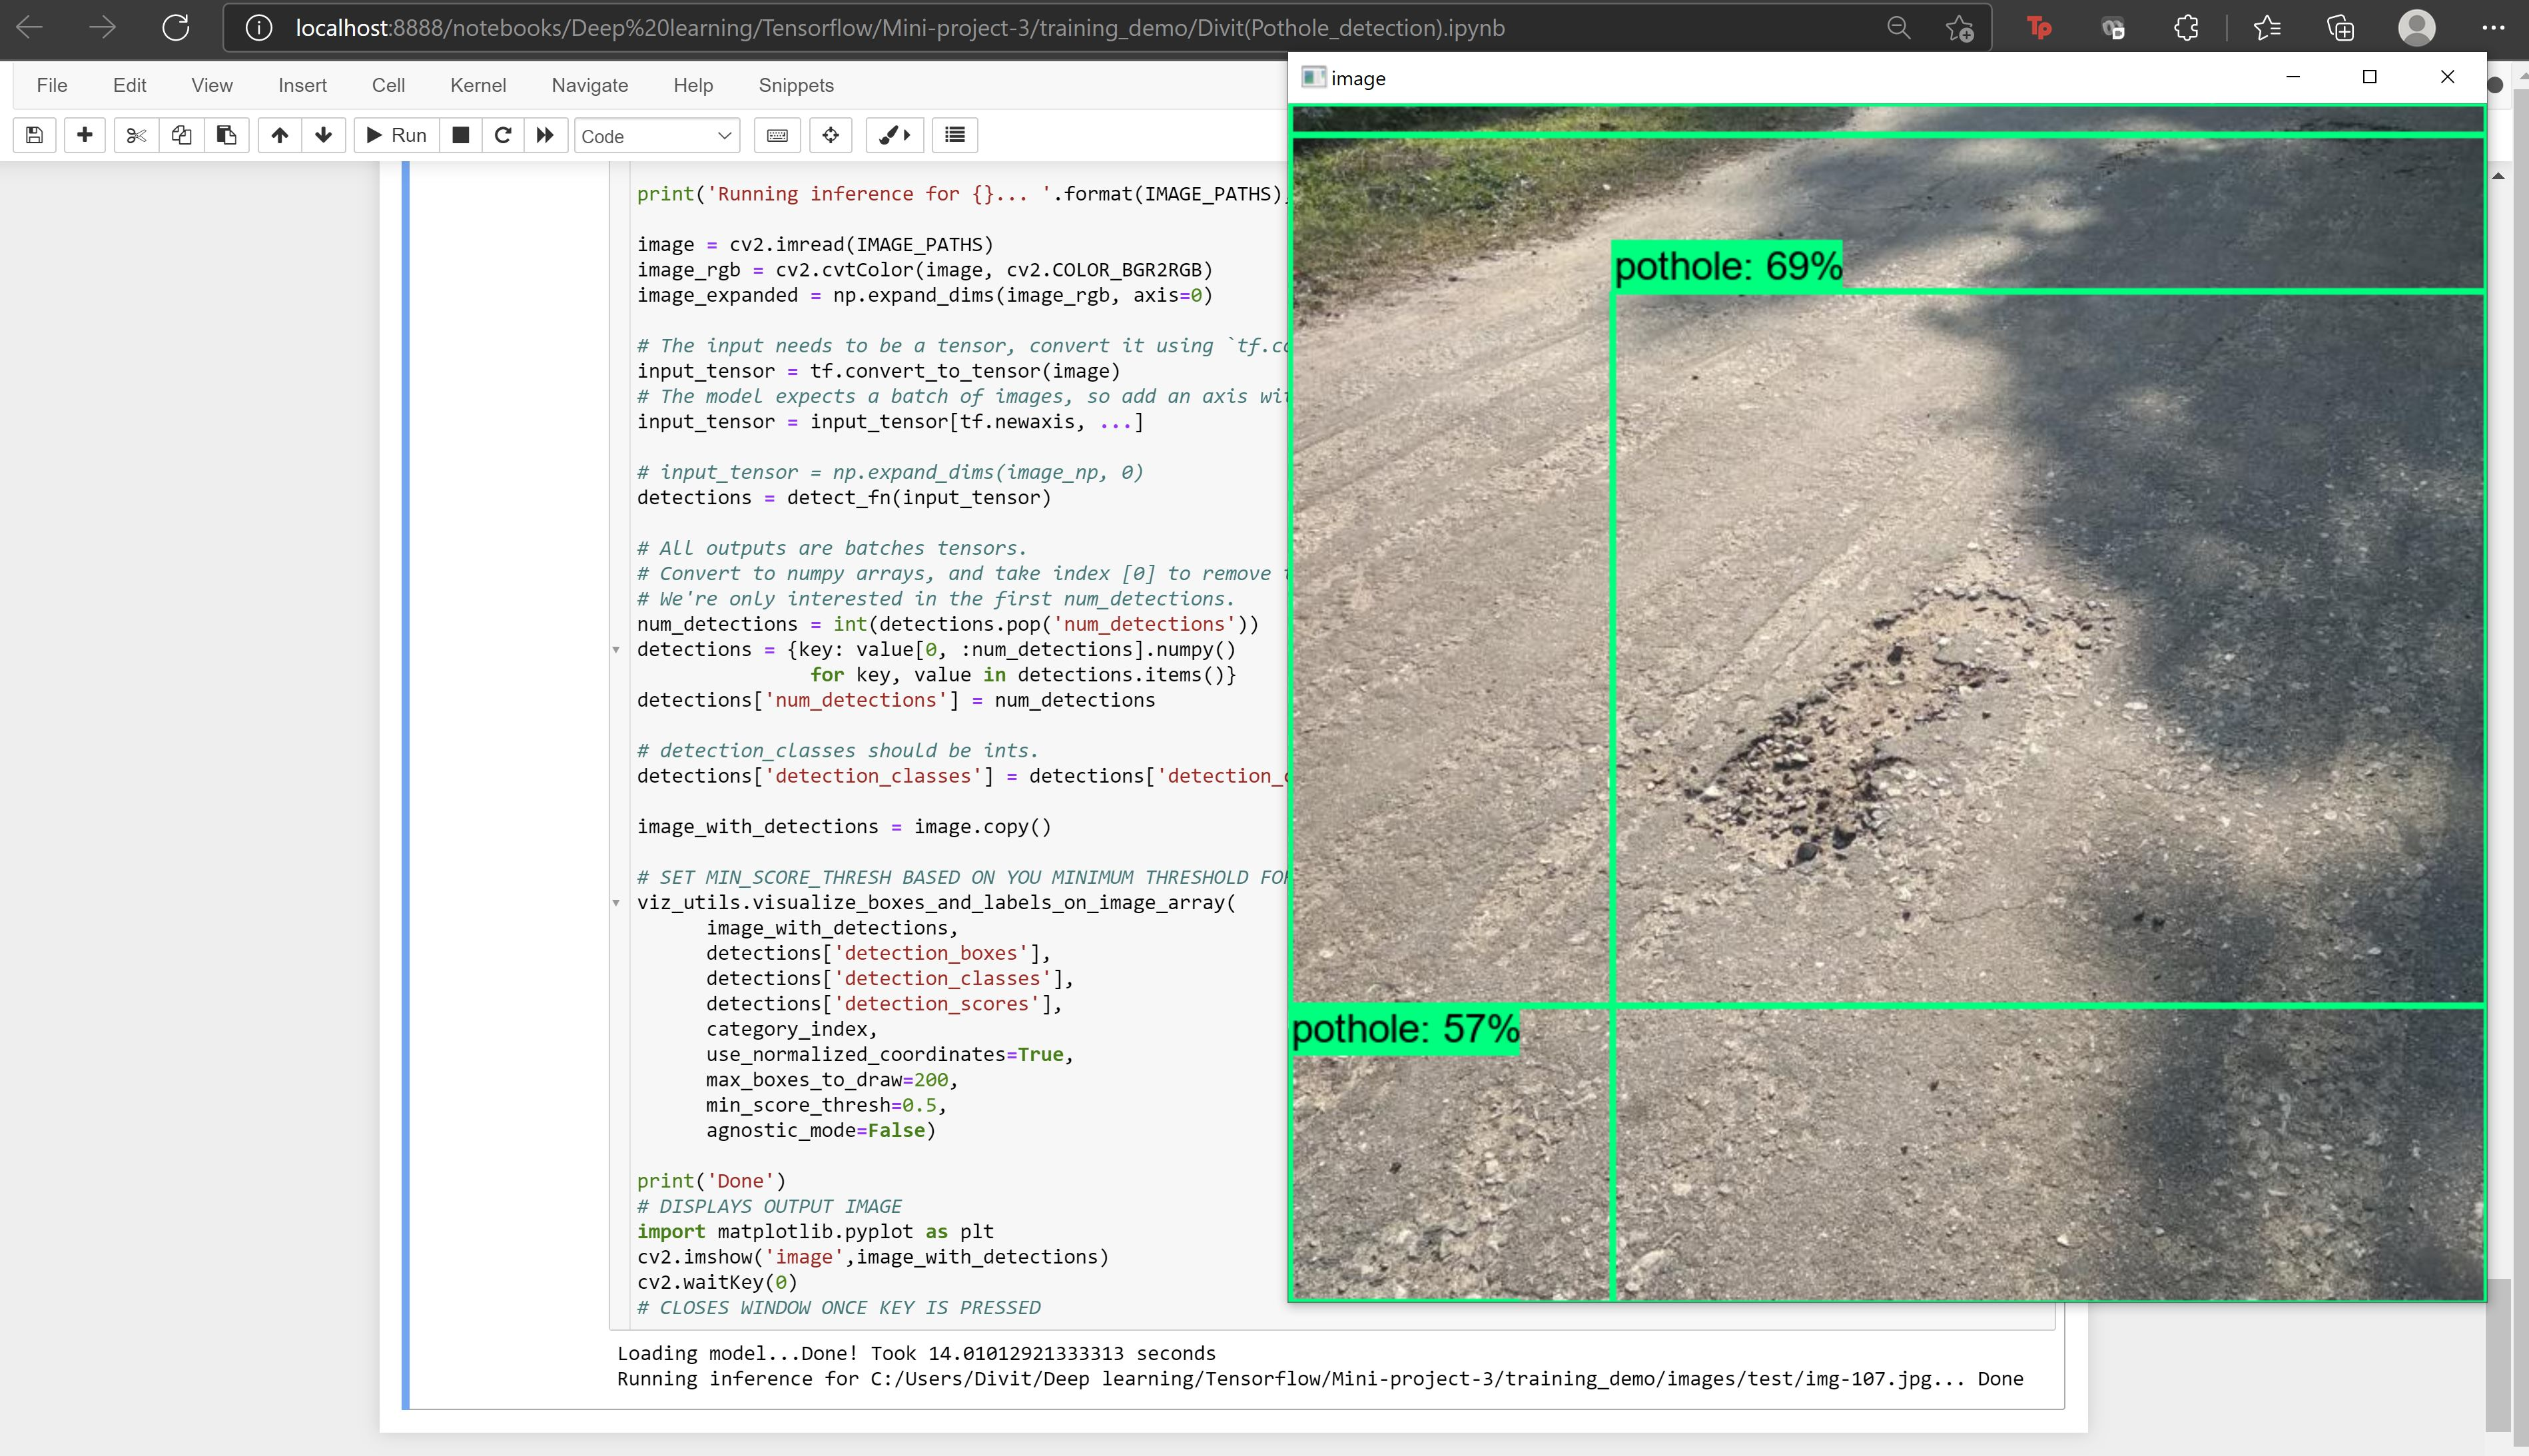

Batch size= 1;
Number of steps= 1000; Epoch = 1

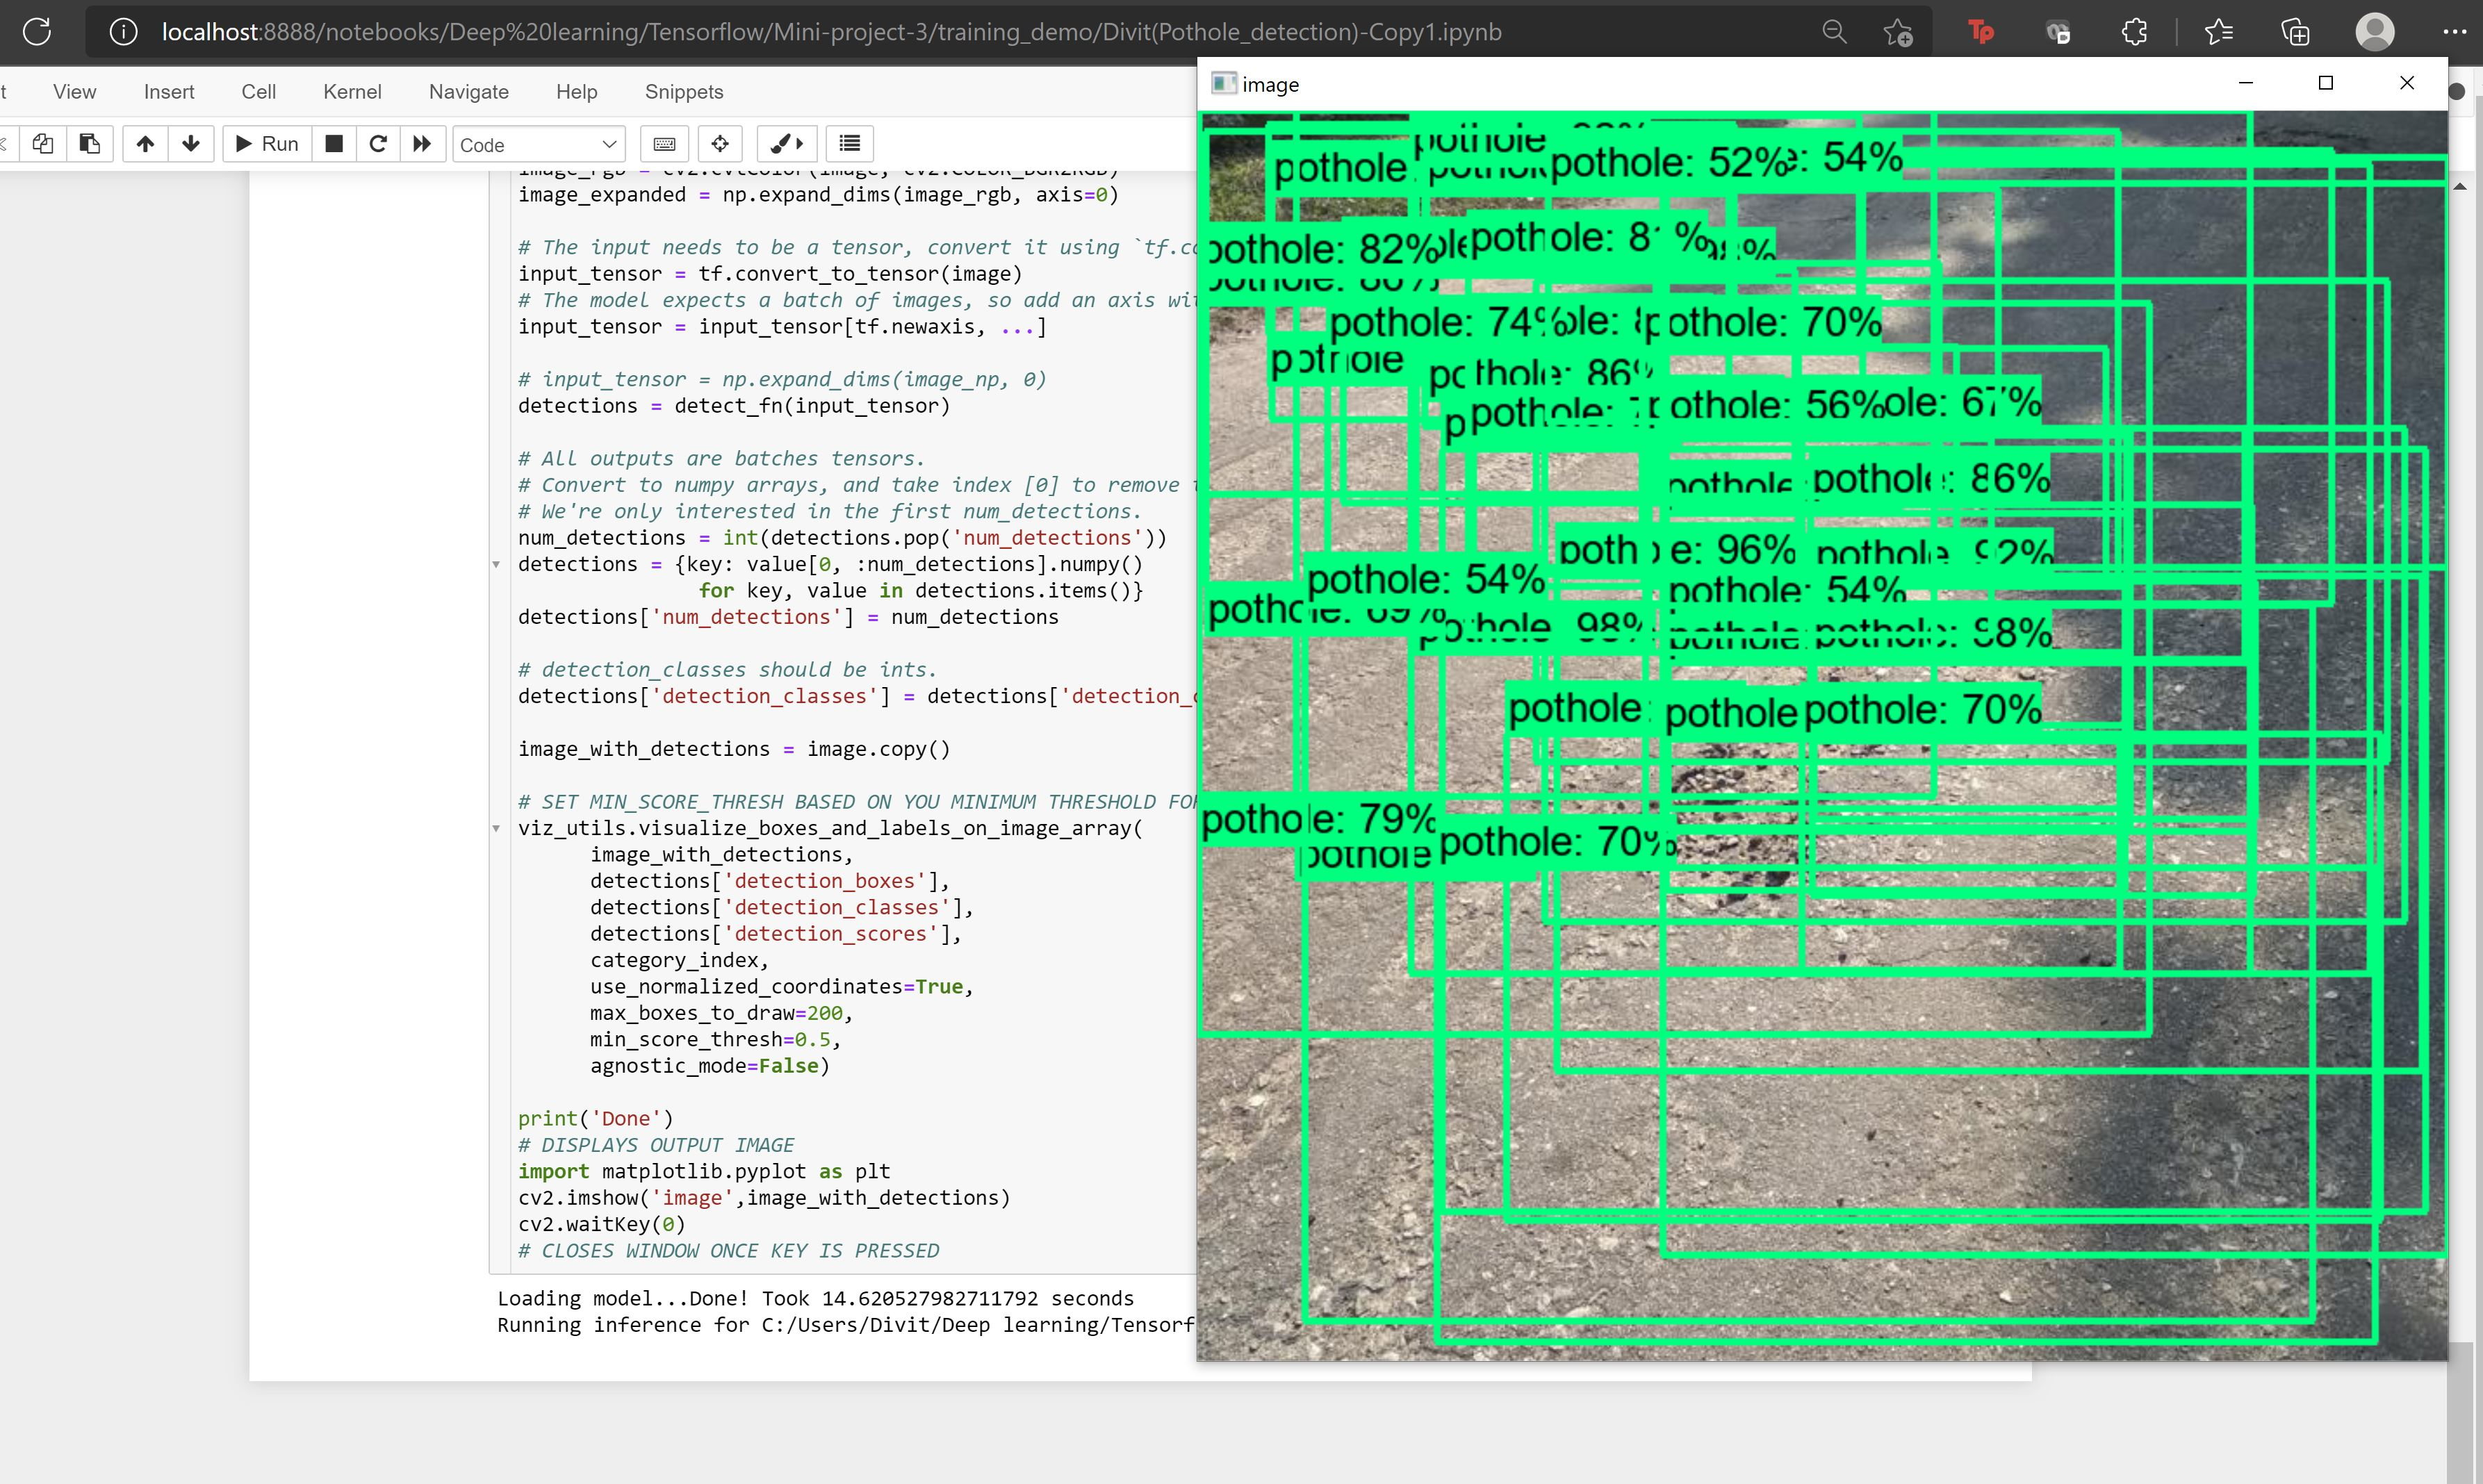

Batch size= 2;
Number of steps= 1000; Epoch = 1


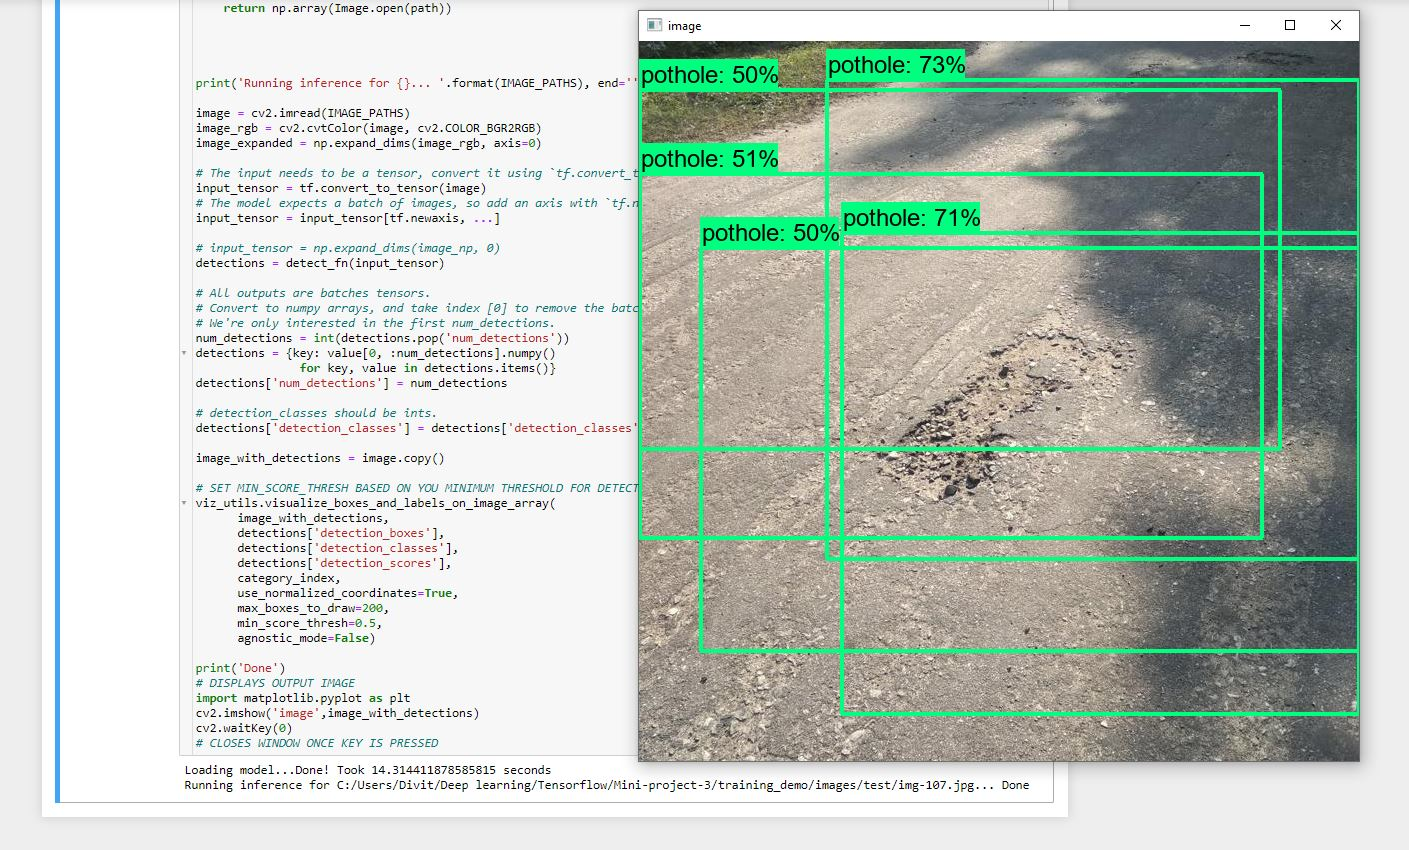

## 7. Conclusion:

A custom Object Detection using TFOD API was performed successfully on the annotated pothole kaggle dataset. 

After testing the model on chosen picture, we found that the best results was when we used 1500 steps with a batch size of 2. The results can be further improved by increasing the number of steps, we can see the accuracy being improved